In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\dataset\heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
df[(df.sex==1)&(df.age>40)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


# Explanation of the features:

age: age in years

sex: (1 = male; 0 = female)

cp: chest pain type

trestbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by flourosopy

thal: 1 = normal; 2 = fixed defect; 3 = reversable defect

target: refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Correlation

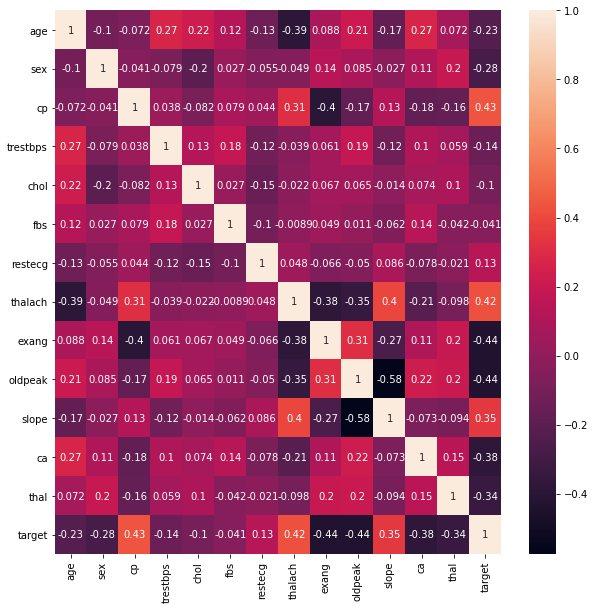

In [7]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

# With and without diseases

In [8]:
NoDisease = df[df.target == 0].shape[0]
Disease = df[df.target == 1].shape[0]
d = {'NoDisease': [NoDisease], 'Disease': [Disease]}
pd.DataFrame(data=d)

,NoDisease,Disease
0,499,526


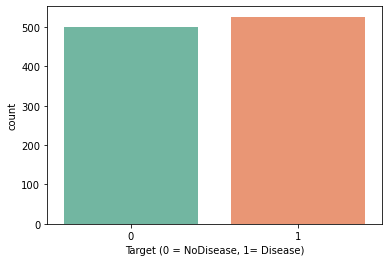

In [9]:
sns.countplot(x="target", data=df, palette="Set2")
plt.xlabel("Target (0 = NoDisease, 1= Disease)")
plt.show()

# Male and female with diseases

In [10]:
female = df[(df.sex == 0)&(df.target == 1)].shape[0]
male = df[(df.sex == 1)&(df.target == 1)].shape[0]
d = {'female': [female], 'male': [male]}
pd.DataFrame(data=d)

,female,male
0,226,300


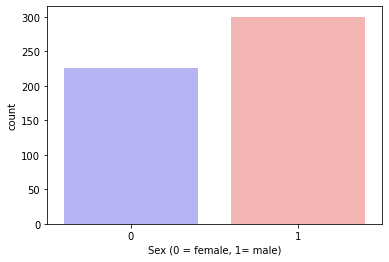

In [11]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
sns.countplot(x="sex", data=df1, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

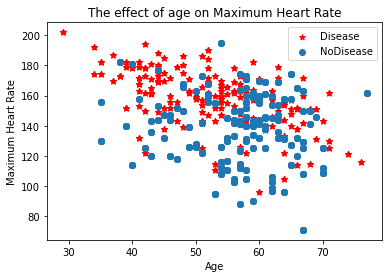

In [12]:
plt.scatter(x=df1.age, y=df1.thalach, c="red", marker='*')
plt.scatter(x=df0.age, y=df0.thalach)
plt.legend(["Disease", "NoDisease"])
plt.title('The effect of age on Maximum Heart Rate')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()
# sns.scatterplot(x=df['age'],y=df['thalach'], hue=df['target'])

It can be seen that patients usually have higher maximum heart rate

## Quantity by age and by disease

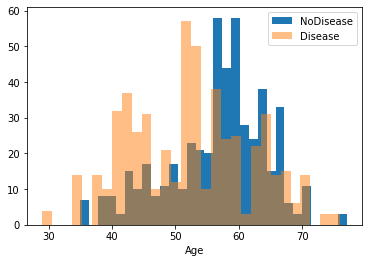

In [13]:
plt.hist(df0.age, density=False, bins=30) 
plt.xlabel('Age')
plt.hist(df1.age, density=False, bins=30, alpha=0.5)
plt.legend(["NoDisease", "Disease"])
plt.show()

## Quantity by trestbps and by disease

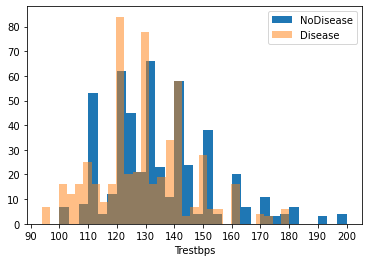

In [14]:
plt.hist(df0.trestbps, density=False, bins=30) 
plt.xlabel('Trestbps')
plt.hist(df1.trestbps, density=False, bins=30, alpha=0.5)
plt.xticks(np.arange(90,201,10))
plt.legend(["NoDisease", "Disease"])
plt.show()

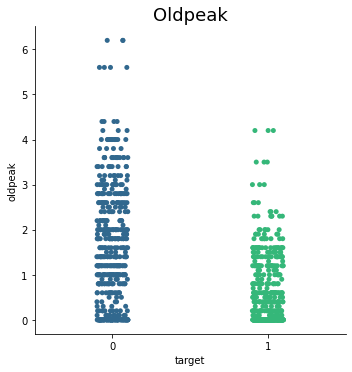

In [15]:
sns.catplot(x="target", y="oldpeak", data=df, palette = "viridis")
plt.title('Oldpeak', fontsize = 18)
plt.xlabel('target')
plt.ylabel('oldpeak')
plt.show()

In [16]:
df['age2'] = df.apply(lambda row: (row.age * 0.1), axis = 1)
df['trestbps2'] = df.apply(lambda row: (row.trestbps * 0.01), axis = 1)
df['chol2'] = df.apply(lambda row: (row.chol * 0.01), axis = 1)
df['thalach2'] = df.apply(lambda row: (row.thalach * 0.01), axis = 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age2,trestbps2,chol2,thalach2
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,5.2,1.25,2.12,1.68
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,5.3,1.40,2.03,1.55
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,7.0,1.45,1.74,1.25
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,6.1,1.48,2.03,1.61
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,6.2,1.38,2.94,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,5.9,1.40,2.21,1.64
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,6.0,1.25,2.58,1.41
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,4.7,1.10,2.75,1.18
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,5.0,1.10,2.54,1.59


# Division of data

In [17]:
from sklearn.model_selection import train_test_split
x = df.drop(labels = ['target', 'thalach', 'trestbps', 'chol', 'age'], axis=1)
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=2)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(768, 13) (257, 13)
(768,) (257,)


# KNN Model

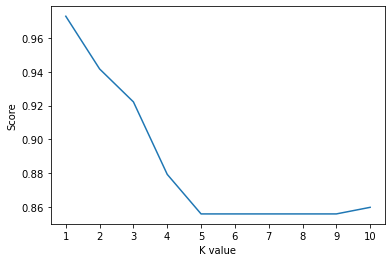

the maximum KNN score is: 97.27626459143968% while k=1


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
arr = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    arr.append(accuracy_score(y_test, knn_predict))
    
plt.plot(range(1,11), arr)
plt.xticks(np.arange(1,11,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

maxS = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=1")

In [62]:
# the best k:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_predict)*100
knn_accuracy

94.16342412451361

# Decision Tree Model

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf_predict = clf.predict(x_test)
clf_accuracy = accuracy_score(y_test, clf_predict)
clf_accuracy

0.9455252918287937

# Random Forest Model

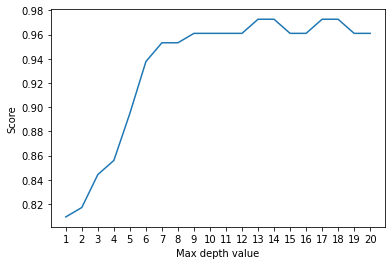

the maximum Random Forest score is: 97.27626459143968% while max depth=12


In [21]:
from sklearn.ensemble import RandomForestClassifier
arr = []
for i in range(1,21):
    ran = RandomForestClassifier(max_depth=i)
    ran.fit(x_train, y_train)
    ran_predict = ran.predict(x_test)
    arr.append(accuracy_score(y_test, ran_predict))

plt.plot(range(1,21), arr)
plt.xticks(np.arange(1,21,1))
plt.xlabel("Max depth value")
plt.ylabel("Score")
plt.show()

ran_accuracy = max(arr)
print ("the maximum Random Forest score is: " + str(ran_accuracy*100) + "% while max depth=12")

# Dummy Model

In [22]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(x_train, y_train)
DummyClassifier(strategy='uniform')
dummy_predict = dummy_clf.predict(x_test)
dummy_accuracy = dummy_clf.score(y_test, dummy_predict)
dummy_accuracy

0.46303501945525294

# Model Accuracy

Text(0, 0.5, 'Accuracy (%)')

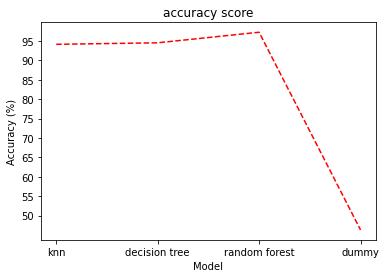

In [23]:
arrX = ['knn', 'decision tree', 'random forest', 'dummy']
arrY = [knn_accuracy*100, clf_accuracy*100, ran_accuracy*100,  dummy_accuracy*100]
plt.plot (arrX, arrY, 'r--')
plt.title('accuracy score')
plt.yticks(np.arange(50,100,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")

# Confusion Matrix

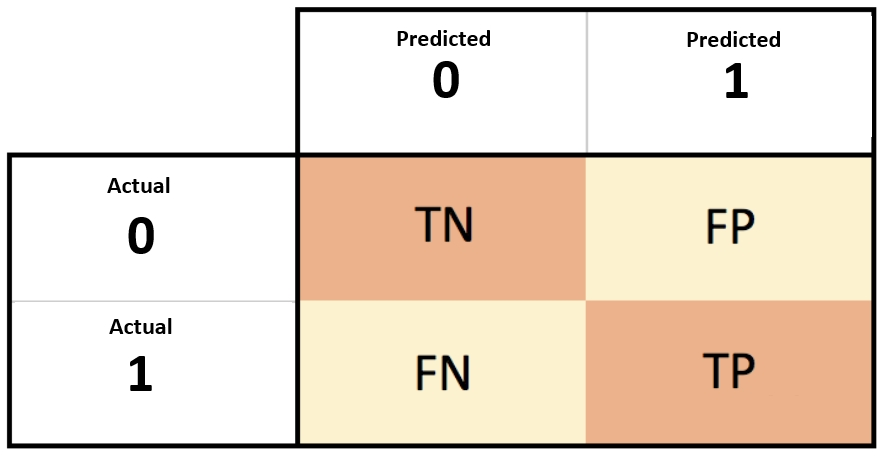

In [24]:
from sklearn import metrics
knn_confusion = metrics.confusion_matrix(y_test, knn_predict)
clf_confusion = metrics.confusion_matrix(y_test, clf_predict)
ran_confusion = metrics.confusion_matrix(y_test, ran_predict)
dummy_confusion = metrics.confusion_matrix(y_test, dummy_predict)

0=Negative 1=Positive


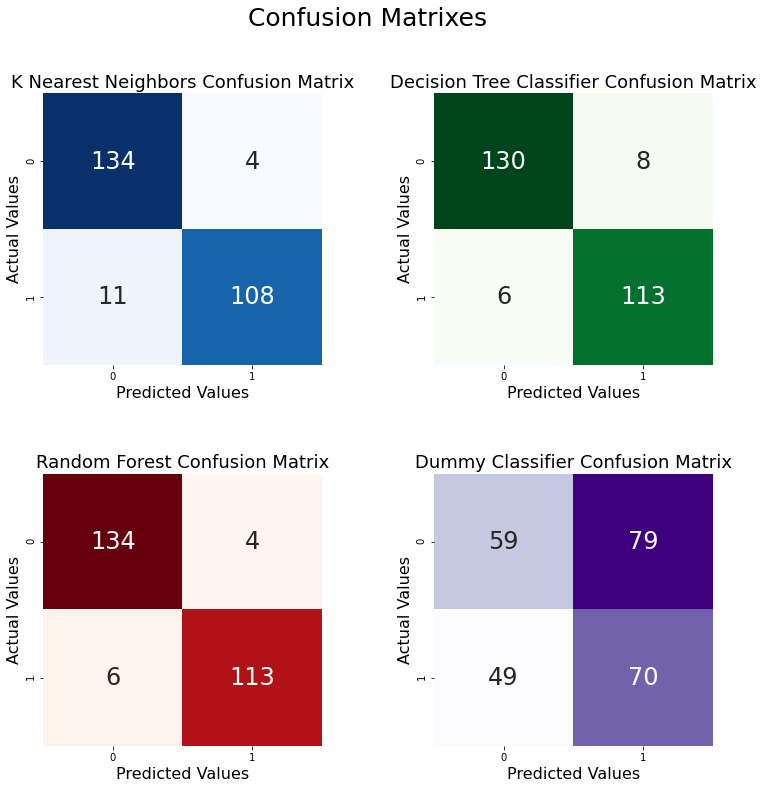

In [25]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("K Nearest Neighbors Confusion Matrix",fontsize=18)
sns.heatmap(knn_confusion,annot=True,cmap="Blues", fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,2)
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=18)
sns.heatmap(clf_confusion,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,3)
plt.title("Random Forest Confusion Matrix",fontsize=18)
sns.heatmap(ran_confusion,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,4)
plt.title("Dummy Classifier Confusion Matrix",fontsize=18)
sns.heatmap(dummy_confusion,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

print("0=Negative", "1=Positive")

plt.show()

# Precision and Recall

In [26]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
knn_r = recall_score(y_test, knn_predict, average='micro')
clf_r = recall_score(y_test, clf_predict, average='micro')
ran_r = recall_score(y_test, ran_predict, average='micro')
dummy_r = recall_score(y_test, dummy_predict, average='micro')

knn_p = precision_score(y_test, knn_predict, average='macro')
clf_p = precision_score(y_test, clf_predict, average='macro')
ran_p = precision_score(y_test, ran_predict, average='macro')
dummy_p = precision_score(y_test, dummy_predict, average='macro')

arrY3 = [knn_p*100, clf_p*100, ran_p*100,  dummy_p*100]
plt.plot (arrX, arrY2, 'y')
plt.plot (arrX, arrY3, 'bs')
plt.title('Precision and Recall', fontsize = 16)
plt.legend(['Recall', 'Precision'])
plt.yticks(np.arange(50,100,5))
plt.xlabel("Model")
plt.ylabel("Precision and Recall")

NameError: name 'arrY2' is not defined

## KNN:

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       138
           1       0.96      0.91      0.94       119

    accuracy                           0.94       257
   macro avg       0.94      0.94      0.94       257
weighted avg       0.94      0.94      0.94       257



## Decision Tree:

In [31]:
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       138
           1       0.93      0.95      0.94       119

    accuracy                           0.95       257
   macro avg       0.94      0.95      0.95       257
weighted avg       0.95      0.95      0.95       257



## Random Forest:

In [32]:
print(classification_report(y_test, ran_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       138
           1       0.97      0.95      0.96       119

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



## Dummy:

In [33]:
print(classification_report(y_test, dummy_predict))

              precision    recall  f1-score   support

           0       0.55      0.43      0.48       138
           1       0.47      0.59      0.52       119

    accuracy                           0.50       257
   macro avg       0.51      0.51      0.50       257
weighted avg       0.51      0.50      0.50       257



# ROC Curve

NameError: name 'knn_auc' is not defined

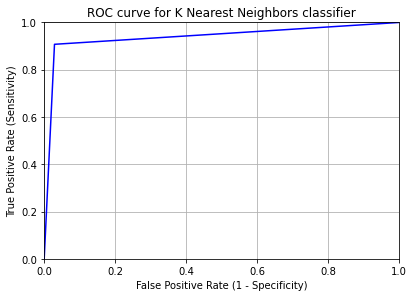

In [34]:
plt.figure(figsize=(14,10))

plt.subplots_adjust(wspace = 0.2, hspace= 0.3)

plt.subplot(2,2,1)
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_predict)
plt.plot(fpr, tpr, 'b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for K Nearest Neighbors classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print(f"The K Nearest Neighbors score ROC Curve is: " + str(knn_auc*100) + "%")

plt.subplot(2,2,2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, clf_predict)
plt.plot(fpr, tpr, 'g')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Tree Classifier classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print(f"The Decision Tree Classifier score ROC Curve is: " + str(clf_auc*100) + "%")

plt.subplot(2,2,3)
fpr, tpr, thresholds = metrics.roc_curve(y_test, ran_predict)
plt.plot(fpr, tpr, 'r')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("The Random Forest score ROC Curve is: " + str(ran_auc*100) + "%")

plt.subplot(2,2,4)
fpr, tpr, thresholds = metrics.roc_curve(y_test, dummy_predict)
plt.plot(fpr, tpr, 'tab:purple')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Dummy classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print(f"The Dummy Classifier score ROC Curve is: " + str(dummy_auc*100) + "%")

## I will try to improve the accuracy using models of ensemble learning:

In [66]:
# the maximum accuracy was of the Random Forest model:
RandomForestClassifier(max_depth=12)
ran.fit(x_train, y_train)
ran_predict = ran.predict(x_test)
ran_accuracy = accuracy_score(y_test, ran_predict)*100
print ("random forest accuracy: " + str(ran_accuracy) + "%")

random forest accuracy: 97.27626459143968%


# Ensemble learning models

# AdaBoost:

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada.fit(x_train, y_train)
AdaBoostClassifier(n_estimators=1000, random_state=0)
ada_predict = ada.predict(x_test)
ada_accuracy = accuracy_score(y_test, ada_predict)*100
print ("AdaBoost accuracy: " + str(ada_accuracy) + "%")

AdaBoost accuracy: 97.66536964980544%


# XGBoost:

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(x_train, y_train)
xgb_predict = xgb.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_predict)*100
print ("XGBoost accuracy: " + str(xgb_accuracy) + "%")

XGBoost accuracy: 96.10894941634241%


# Stacking:

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
sta = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
sta.fit(x_train, y_train)
sta_predict = sta.predict(x_test)
sta_accuracy = accuracy_score(y_test, sta_predict)*100
print ("Stacking accuracy: " + str(sta_accuracy) + "%")

Stacking accuracy: 94.94163424124513%


# Voting:

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree
clf1 = KNeighborsClassifier(n_neighbors=2)
clf2 = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf3 = GaussianNB()
vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
vot.fit(x_train, y_train)
vot_predict = vot.predict(x_test)
vot_accuracy = accuracy_score(y_test, vot_predict)*100
print ("Voting accuracy: " + str(vot_accuracy) + "%")

Voting accuracy: 97.27626459143968%


# Pipeline:

In [40]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(x_train, y_train)
pip_predict = pip.predict(x_test)
pip_accuracy = accuracy_score(y_test, pip_predict)*100
print ("Pipeline accuracy: " + str(pip_accuracy) + "%")

Pipeline accuracy: 91.43968871595331%


# KMeans

In [41]:
from sklearn.cluster import KMeans
kme = KMeans(n_clusters=10)
kme.fit(x_train, y_train)
kme_predict = kme.predict(x_test)
kme_accuracy = accuracy_score(y_test, kme_predict)*100
print ("KMeans accuracy: " + str(kme_accuracy) + "%")

KMeans accuracy: 12.45136186770428%


# Comparison between the models:

Text(0, 0.5, 'Accuracy (%)')

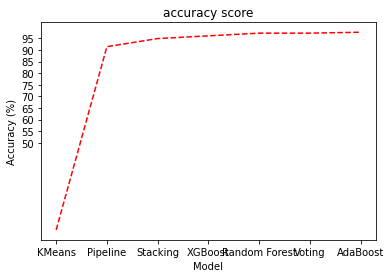

In [42]:
arrX = ['KMeans','Pipeline', 'Stacking', 'XGBoost', 'Random Forest', 'Voting', 'AdaBoost']
arrY = [kme_accuracy, pip_accuracy, sta_accuracy, xgb_accuracy, ran_accuracy, vot_accuracy, ada_accuracy]
plt.plot (arrX, arrY, 'r--')
plt.title('accuracy score')
plt.yticks(np.arange(50,100,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")

In conclusion, The best model compared to the random forest is AdaBoost
But the improvement is not really great.

I will show the confusion metrix of the 4 models with the best accuracies before pca:

# Confusion matrix before PCA:

In [ ]:
from sklearn import metrics
ran_confusion = metrics.confusion_matrix(y_test, ran_predict)
ada_confusion = metrics.confusion_matrix(y_test, ada_predict)
vot_confusion = metrics.confusion_matrix(y_test, vot_predict)
xgb_confusion = metrics.confusion_matrix(y_test, xgb_predict)

0=Negative 1=Positive


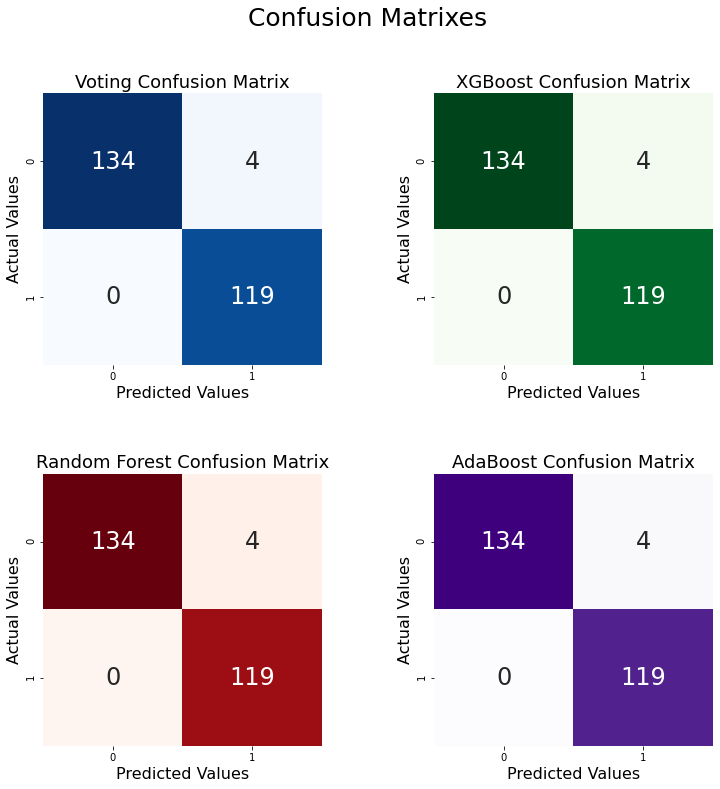

In [65]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Voting Confusion Matrix",fontsize=18)
sns.heatmap(vot_confusion2,annot=True,cmap="Blues", fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,2)
plt.title("XGBoost Confusion Matrix",fontsize=18)
sns.heatmap(xgb_confusion2,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,3)
plt.title("Random Forest Confusion Matrix",fontsize=18)
sns.heatmap(ran_confusion2,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,4)
plt.title("AdaBoost Confusion Matrix",fontsize=18)
sns.heatmap(ada_confusion2,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

print("0=Negative", "1=Positive")

plt.show()

In [43]:
# I will check the number of columns of the data to decide how much to lower the pca:
print(x_train.shape)
print(x_test.shape)

(768, 13)
(257, 13)


#### I will check in a loop on some of the models all the options of the pca and what is the best option

## AdaBoost:

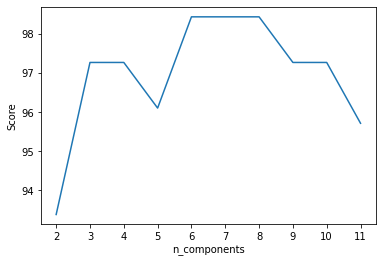

the maximum  AdaBoost score is: 98.44357976653697% while n_components=6


In [44]:
from sklearn.decomposition import PCA
arr = []
for i in range(2,12):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
    ada.fit(X_train, y_train)
    AdaBoostClassifier(n_estimators=1000, random_state=0)
    ada_predict = ada.predict(X_test)
    arr.append(accuracy_score(y_test, ada_predict)*100)

plt.plot(range(2,12), arr)
plt.xticks(np.arange(2,12,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

ada_pca = max(arr)
print ("the maximum  AdaBoost score is: " + str(ada_pca) + "% while n_components=6")
# We choose the number of columns to be 6 because it reduces the positions the most and gives the highest accuracy

## Random Forest:

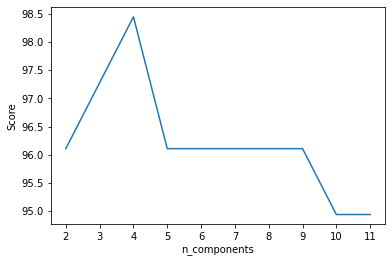

the maximum Random Forest score is: 98.44357976653697% while n_components=4


In [45]:
arr = []
for i in range(2,12):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    ran = RandomForestClassifier(max_depth=12)
    ran.fit(X_train, y_train)
    ran_predict = ran.predict(X_test)
    arr.append(accuracy_score(y_test, ran_predict)*100)

plt.plot(range(2,12), arr)
plt.xticks(np.arange(2,12,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

ran_pca = max(arr)
print ("the maximum Random Forest score is: " + str(ran_pca) + "% while n_components=4")

## XGBoost:

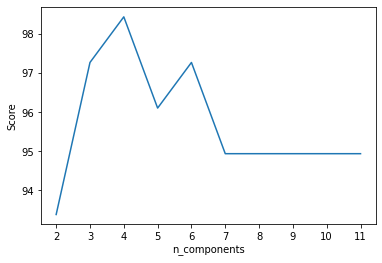

the maximum XGBoost score is: 98.44357976653697% while n_components=4


In [46]:
from xgboost import XGBClassifier
arr = []
for i in range(2,12):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    xgb = XGBClassifier(eval_metric='mlogloss')
    xgb.fit(X_train, y_train)
    xgb_predict = xgb.predict(X_test)
    arr.append(accuracy_score(y_test, xgb_predict)*100)

plt.plot(range(2,12), arr)
plt.xticks(np.arange(2,12,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

xgb_pca = max(arr)
print ("the maximum XGBoost score is: " + str(xgb_pca) + "% while n_components=4")

## KNN:

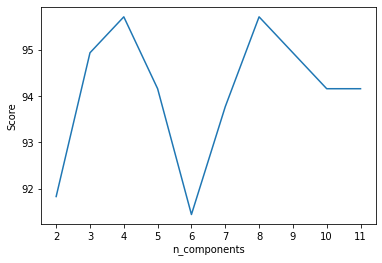

the maximum KNeighbors score is: 95.71984435797665% while n_components=4


In [47]:
arr = []
for i in range(2,12):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_test)
    arr.append(accuracy_score(y_test, knn_predict)*100)

plt.plot(range(2,12), arr)
plt.xticks(np.arange(2,12,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

knn_pca = max(arr)
print ("the maximum KNeighbors score is: " + str(knn_pca) + "% while n_components=4")

## Voting:

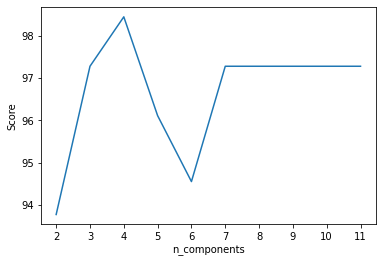

the maximum Voting score is: 98.44357976653697% while n_components=4


In [48]:
arr = []
for i in range(2,12):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    clf1 = KNeighborsClassifier(n_neighbors=2)
    clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf3 = GaussianNB()
    vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
    vot.fit(X_train, y_train)
    vot_predict = vot.predict(X_test)
    arr.append(accuracy_score(y_test, vot_predict)*100)

plt.plot(range(2,12), arr)
plt.xticks(np.arange(2,12,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

vot_pca = max(arr)
print ("the maximum Voting score is: " + str(vot_pca) + "% while n_components=4")

I will show the Confusion Matrix of the 4 models with the best accuracies after the PCA:

# Confusion matrix after PCA:

In [64]:
pca = PCA(n_components = 4)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

# Define vot_predict2 according to the pca that gives the best accuracy:
vot.fit(X_train, y_train)
vot_predict2 = vot.predict(X_test)

# Define xgb_predict2 according to the pca that gives the best accuracy:
xgb.fit(X_train, y_train)
xgb_predict2 = xgb.predict(X_test)

# Define ran_predict2 according to the pca that gives the best accuracy:
ran.fit(X_train, y_train)
ran_predict2 = ran.predict(X_test)

# Define ada_predict2 according to the pca that gives the best accuracy:
pca = PCA(n_components = 6)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
ada.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=1000, random_state=0)
ada_predict2 = ada.predict(X_test)

ran_confusion2 = metrics.confusion_matrix(y_test, ran_predict2)
ada_confusion2 = metrics.confusion_matrix(y_test, ada_predict2)
vot_confusion2 = metrics.confusion_matrix(y_test, vot_predict2)
xgb_confusion2 = metrics.confusion_matrix(y_test, xgb_predict2)

0=Negative 1=Positive


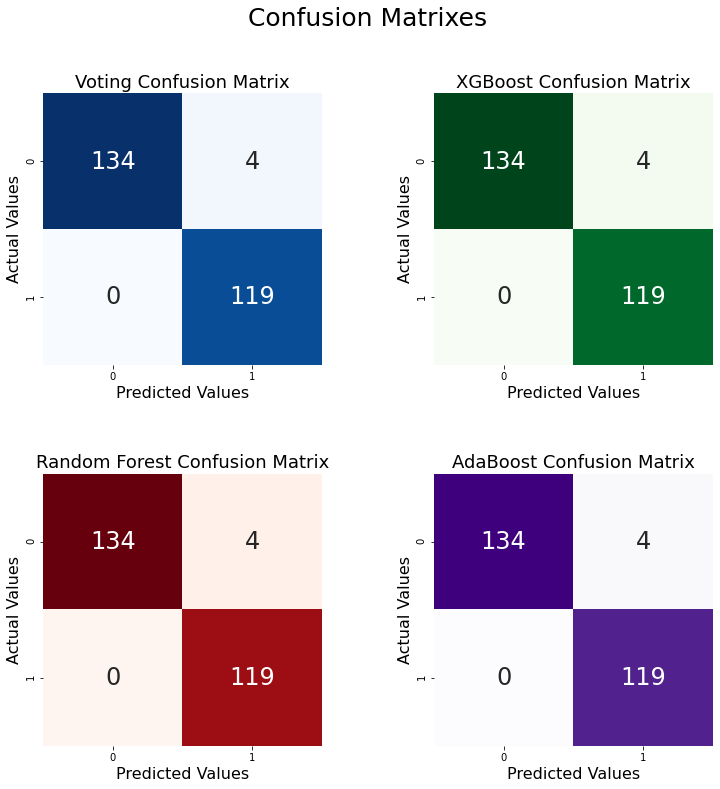

In [65]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Voting Confusion Matrix",fontsize=18)
sns.heatmap(vot_confusion2,annot=True,cmap="Blues", fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,2)
plt.title("XGBoost Confusion Matrix",fontsize=18)
sns.heatmap(xgb_confusion2,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,3)
plt.title("Random Forest Confusion Matrix",fontsize=18)
sns.heatmap(ran_confusion2,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,4)
plt.title("AdaBoost Confusion Matrix",fontsize=18)
sns.heatmap(ada_confusion2,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

print("0=Negative", "1=Positive")

plt.show()

# Comparison between the models after PCA and before:

Text(0, 0.5, 'Accuracy (%)')

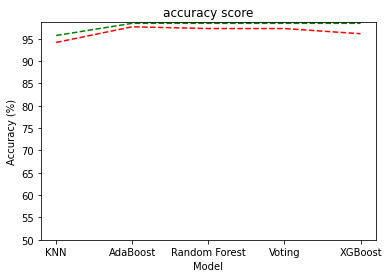

In [63]:
arrX = ['KNN', 'AdaBoost', 'Random Forest', 'Voting', 'XGBoost']
arrY = [knn_pca, ada_pca, ran_pca, vot_pca, xgb_pca]
arrY2 = [knn_accuracy, ada_accuracy, ran_accuracy, vot_accuracy, xgb_accuracy]
plt.plot (arrX, arrY, 'g--')
plt.plot (arrX, arrY2, 'r--')
plt.title('accuracy score')
plt.yticks(np.arange(50,100,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
# The red line shows the accuracy of the 5 best information before the pca.
# The green line shows the accuracy after the pca.
# It can be seen that pca improves accuracy.

In summary, we have 3 models (Random Forest, Voting, XGBoost) that when we reduce the number of columns by PCA to 4, we give the highest accuracy - 98.44%,
Compared to the 97.27% accuracy I got the previous semester by the model Random Forest.
I was able to improve the accuracy by 1.17%.